In [2]:
# Chan_6th_Logistic_data_Analysis
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
mydata = pd.read_csv('D:\Desktop4\DataFiles\GitHub_Data\Chan_data_set\Churn_Modelling.csv')

In [3]:
mydata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
mydata.shape

(10000, 14)

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Data Analysis (Uni variate )

In [6]:
# Check the distribution
mydata['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

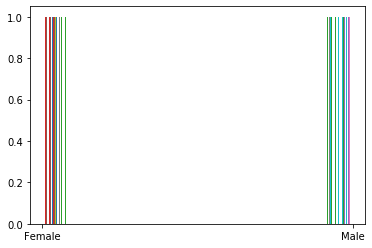

In [7]:
plt.hist(x=mydata['Gender'],bins=10)
plt.show()

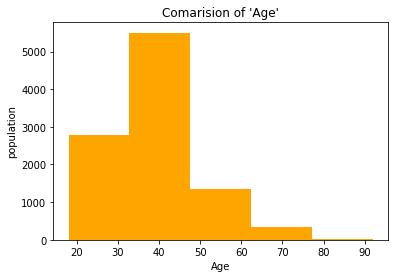

In [8]:
# Check the distribution and comarision of 'Age' with population
# Note: it is bad distribution in graph
plt.hist(x=mydata['Age'],bins=5,color='orange')
plt.title("Comarision of 'Age'")
plt.xlabel("Age")
plt.ylabel('population')
plt.show()


In [9]:
# check the distribution of Location badsed 'Geography'
mydata['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

ValueError: color kwarg must have one color per data set. 10000 data sets and 1 colors were provided

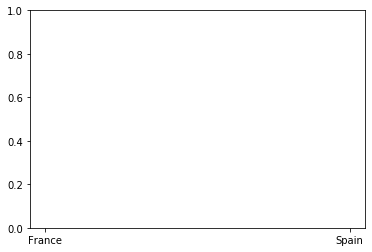

In [10]:
# Check the distribution and comarision of 'Geography' with population
plt.hist(x=mydata['Geography'],bins=5,color='red')
plt.title("Comarision of 'Geography wrt population'")
plt.xlabel("Geography")
plt.ylabel('population')
plt.show()

In [132]:
mydata['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

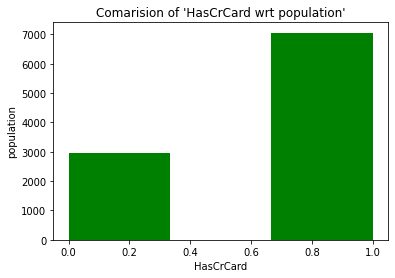

In [133]:
# Check the distribution and comarision of 'HasCrCard' with population
plt.hist(x=mydata['HasCrCard'],bins=3,color='green')
plt.title("Comarision of 'HasCrCard wrt population'")
plt.xlabel("HasCrCard")
plt.ylabel('population')
plt.show()

Data Analysis (Bi-Variate )
Categorical & Categorical

In [134]:
# Note:- crosstab only works for categorical values 
#pd.crosstab(mydata['Gender'],mydata['Geography'],margins=True,margins_name='Total')
pd.crosstab(mydata['Gender'],mydata['Geography'])

Geography,France,Germany,Spain
Gender,,,
Female,2261,1193,1089
Male,2753,1316,1388


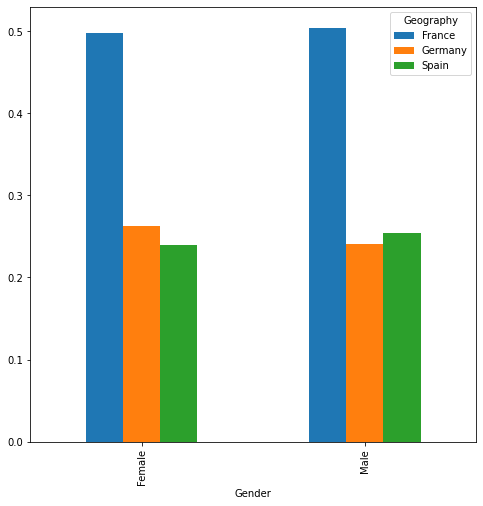

In [135]:
Gender = pd.crosstab(mydata['Gender'],mydata['Geography'])
Gender.div(Gender.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=False,figsize=(8,8))

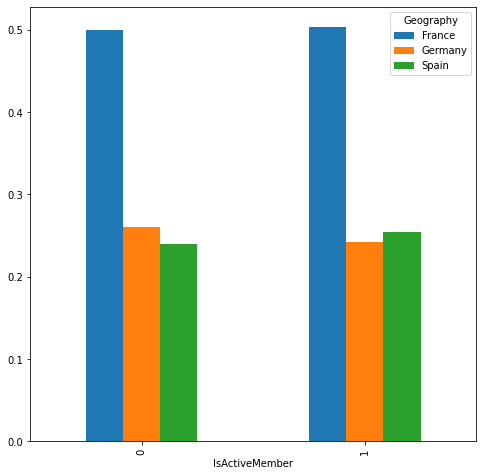

In [136]:
active_member = pd.crosstab(mydata['IsActiveMember'],mydata['Geography'])
active_member.div(active_member.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=False,figsize=(8,8))
plt.show()

Data Analysis (Bi-Variate ) Continuous & Categorical

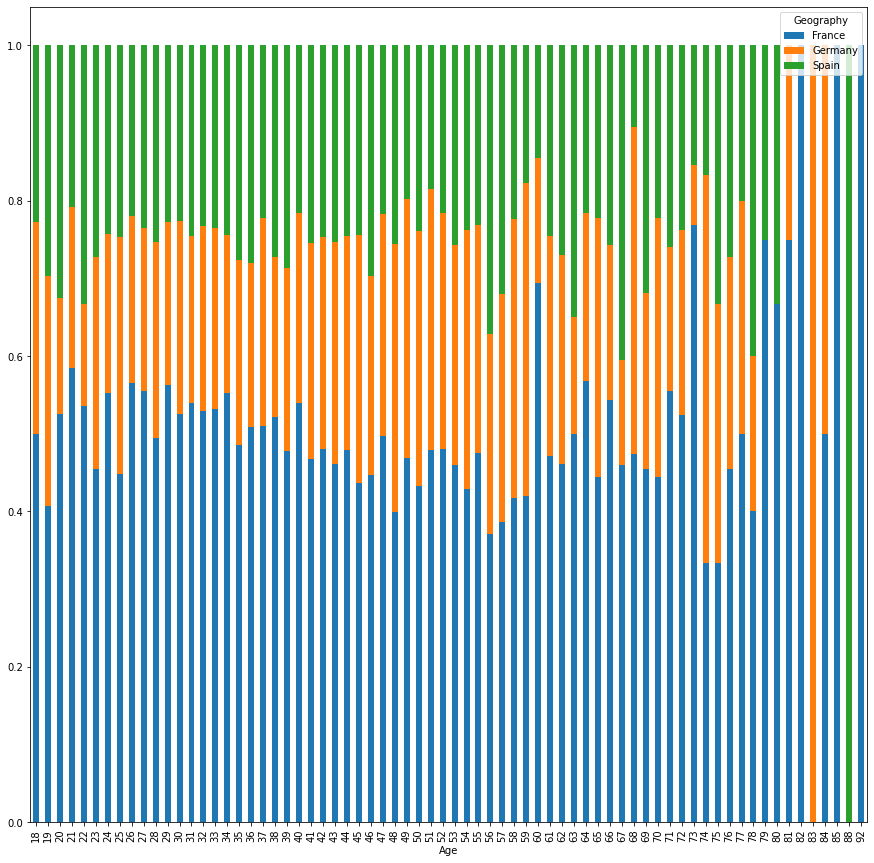

In [137]:
# nalusis using 'Age' and 'Location'

age = pd.crosstab(mydata['Age'],mydata['Geography'])
age.div(age.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True,figsize=(15,15))
plt.show()

In [0]:
# Draw pi chart for more visialization

t_france = mydata.Balance[mydata.Geography == 'France'].sum()
t_germoany = mydata.Balance[mydata.Geography == 'Germany'].sum()
t_spain = mydata.Balance[mydata.Geography == 'Spain'].sum()

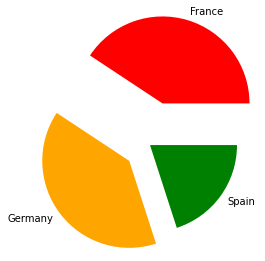

In [139]:
mylabel = ['France','Germany','Spain']
mycolor = ['red','orange','green']
sizes = [t_france,t_germoany,t_spain]

exploads = [.5,.3,0]

plt.pie(sizes,colors=mycolor,labels=mylabel,explode=exploads)
plt.show()

Now Feature Selection 

In [140]:

print(mydata.shape)
print(mydata.dtypes)


(10000, 14)
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [0]:
# Remove coluns which are not usefull 
filterd_data = mydata.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [142]:
print(filterd_data.shape)

(10000, 11)


Now Split data in Feature and target 

In [0]:
X_feature = filterd_data.iloc[:,0:10]
Y_target = filterd_data.iloc[:,10]

In [144]:
#X_feature
Y_target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Now Use Encoading (One-Hot Encoding)

In [0]:
# Demo of One-Hot Encoding
#my_df = pd.DataFrame({'Country':['India','USA','Russia','UK','Dubai','Brazil']})
#pd.get_dummies(my_df,prefix='my')


In [0]:
X_feature = pd.get_dummies(X_feature)

In [146]:
X_feature.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [147]:
print(X_feature.shape)

(10000, 13)


In [148]:
X_feature.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000


Data Pre-processing 

Now do the Feature Scaling:
Type:-

> 1) Normalization (Min-Max Scalar)

> 2) Standarization (Z-Score)












In [149]:
# Use Normalization (Min-Max Scalar) here 

Xsample = np.array([1,11,10,20,30,91])
Xmean = Xsample.mean()
Xstd = Xsample.std()
Xmax = Xsample.max()
Xmin = Xsample.min()
XXscaled=[]
for i in range (len(Xsample)):
    Xscaled =(Xsample[i]-Xmean)/(Xmax-Xmin)
    XXscaled.append(Xscaled)
print(XXscaled) 

[-0.29074074074074074, -0.17962962962962964, -0.19074074074074077, -0.07962962962962965, 0.03148148148148147, 0.7092592592592593]


In [150]:
# Calculate the mean of XXscaled
XNarray = np.array(XXscaled)
print(round(XNarray.mean(),4))

-0.0


In [151]:
XNarray.std()

0.3325556772386375

In [152]:
# Use Standarization (Z-Score ) here 

Z_Score=[]
for i in range (len(Xsample)):
    Xscaled =(Xsample[i]-Xmean)/(Xstd)
    Z_Score.append(Xscaled)
print(Z_Score) 
# Calculate the mean of Z_Score
XNarray = np.array(Z_Score)
print(round(XNarray.mean(),4))

[-0.8742618473841572, -0.5401490394666449, -0.5735603202583962, -0.23944751234088388, 0.09466529557662845, 2.1327534238734533]
-0.0


In [153]:
round(XNarray.std())

1.0

In [154]:
# Note:- During Splitting data , data must be in 'Pandas DataFrame'
from sklearn.model_selection import train_test_split
X_train ,X_test,Y_train,Y_test = train_test_split(X_feature,Y_target,test_size=.30,random_state=101)

print("Total sample in X_feature {} and Y_target {}".format(len(X_feature),len(Y_target)))
print("Total sample in X_train {} and X_test {}".format(len(X_train),len(X_test)))
print("Total sample in Y_train {} and Y_test {}".format(len(Y_train),len(Y_test)))

Total sample in X_feature 10000 and Y_target 10000
Total sample in X_train 7000 and X_test 3000
Total sample in Y_train 7000 and Y_test 3000


In [0]:
# Data Pre-processing using Pre-defined Library (sklearn)
# Note :- sklearn is best library for Pre-Processing 
# After Transformation data conveted into 'Array Format'
from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
# X_feature_scaled = sc.fit(X_feature)       # fit -> use to give data to the Model 
# print("Type of X_feature_scaled is : ",type(X_feature_scaled))

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [156]:
# convert X_feature_scaled in numpy array 
# fit_transform -> Convert any kind of data into 'numpy aaray' 

# X_feature_scaled = sc.fit_transform(X_feature)
# print("Type of X_feature_scaled is : ",type(X_feature_scaled))


print("Type of X_train is : ",type(X_train))



Type of X_train is :  <class 'numpy.ndarray'>


In [157]:
# if u want to see the data (X_train)

X_train = pd.DataFrame(X_train)
#X_train

# take mean of X_train
# Note :- here all mean() = 0 & std() =1 because we have use here Standarization Feature Scaling
print(round(X_train.mean(),4))
print()
print(round(X_train.std(),4))

0    -0.0
1     0.0
2    -0.0
3    -0.0
4     0.0
5    -0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11   -0.0
12    0.0
dtype: float64

0     1.0001
1     1.0001
2     1.0001
3     1.0001
4     1.0001
5     1.0001
6     1.0001
7     1.0001
8     1.0001
9     1.0001
10    1.0001
11    1.0001
12    1.0001
dtype: float64


Now do the Modelling (Logistic Regrassion)

In [158]:
from sklearn.linear_model import LogisticRegression

trainer =  LogisticRegression()
trainer

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
learner = trainer.fit(X_train,Y_train)

Prediction

In [0]:
Ya = Y_test  # Real Value

Yp = learner.predict(X_test)            # X_test is totally unseen for the model


In [161]:
Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
table

,Ya,Yp
0,0,0
1,0,0
2,1,0
3,0,0
4,1,1
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [162]:
table.shape

(3000, 2)

Accuracy

In [163]:
# Lets check that how many times model predicts right (in %)
# This Accuracy u can check by modifying 'test_size=.20' values 
print("Training Accuracy:",learner.score(X_train,Y_train))
print("Testing Accuracy:",learner.score(X_test,Y_test))

Training Accuracy: 0.8135714285714286
Testing Accuracy: 0.8073333333333333


In [164]:
# Try to calculate Accuracy using different Method (Matrics -> Accuracy Score)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Ya,Yp)*100
print("Accuracy Score is : ",acc)


Accuracy Score is :  80.73333333333333


## **Confution Matrix**

In [165]:
conf_matrics = pd.crosstab(table['Ya'],table['Yp'],rownames=['Actual'],colnames=['Prediction'],margins=True)
print(conf_matrics)

Prediction     0    1   All
Actual                     
0           2302   76  2378
1            502  120   622
All         2804  196  3000


In [166]:
# Calulate Accuraccy

Acc = (1531+78)/(1531+46+345+78)
print(Acc)

0.8045


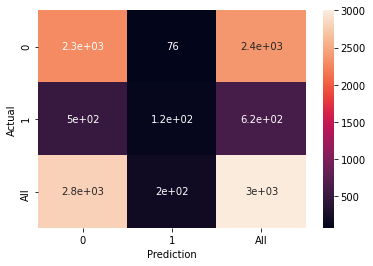

In [167]:
# Show on heat map 
import seaborn as sb
sb.heatmap(conf_matrics,annot=True)
plt.show()

Now using sklearn pre-defined lib

In [168]:
# Now do all this using sklearn pre-defined lib

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ya,Yp)
cm


array([[2302,   76],
       [ 502,  120]])

So here we can see data is not properlly distributes because TP is less (120)(we have to emprove it ) and we have huge sample of TN (2302) .

This is the reasion FN (502) are wrong pridicted (we have to minimize this value) (FN (502) -> Actually One (1) but pridicted 0 ) and Y it happen becaue we have less +ve sample as compare to -ve sample (here we have to remove the -ve or add +ve samples )

FP is (76) is quite good in comparision with FN

Get the values of (TP, FN, FP, TN)

In [175]:
tp,fn,fp,tn = confusion_matrix(Ya,Yp,labels=[1,0]).ravel()

print("TP: {}, FN: {}, FP: {}, TN: {}".format(tp,fn,fp,tn))

TP: 120, FN: 502, FP: 76, TN: 2302


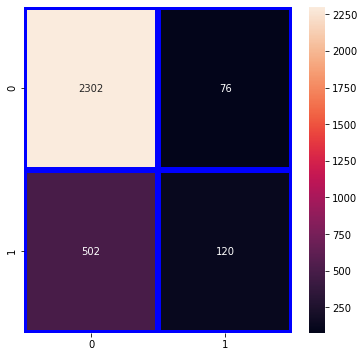

In [176]:
# For more clearence show Heatmap

f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()


Now after this we can calculate (TPR,TNR,Recall,sesitivity,Precision etc.)

In [177]:
# Calculate Precision (+ve Predicted value) & Recall (TPR)

precision = tp/(tp+fp)

recall = tp/(tp+fn)

print("Precision= {} & Recall= {}".format(precision,recall))

Precision= 0.6122448979591837 & Recall= 0.19292604501607716


Here we find CASE:-  "Low Recall & High Precesion" -> Which means , We  miss lots of +ve examples but those we predicted as +ve are indeed +ve

##  F1 Score

In [182]:
# Now calulate the F1-Score (To check Performance of Model)
# Note :- It must be high always 

f1_score =2*(precision*recall)/(precision+recall) 
print(f1_score)

0.293398533007335


Here our model's accuracy was good but performance is BAD! because F1-Score id too low , so main criteria is F1-Score to dicide model is good or bad

Now Using pre-defined lib in sklearn

In [181]:
# now here we can calculate all that above things using pre-defined lib in sklearn

from sklearn.metrics import classification_report

class_report = classification_report(Ya,Yp)
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2378
           1       0.61      0.19      0.29       622

    accuracy                           0.81      3000
   macro avg       0.72      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



Note:- So here we can see that max of the +ve (1) set come in training and max -ve (0) set come in testing part during suffling. (3000 -> 2378(-ve) & 622 (+ve))

So here we need to suffle the data in a way that all +ve & -ve samples distribution will be equally. 

## Validation (CV) :- So Now we will use Cross Validation (CV) for good suffling  (Suffple data in N-Manner)

